# Machine Astrophysics

Introductory reading:
https://otherful.wordpress.com/2018/02/14/gozogon-an-introduction/

"The story takes place on the planet Gozogon, on an S-type orbit around Gnos in the Gnoslor binary system.
Except that the Gozogonians know very little about this because they have not discovered the physics of celestial objects, they don’t have a simple model of gravity.
They do however know, and can predict with precision, the location of any of the bodies they see in the sky, thanks to their supercomputer systems, interlinked across the planet wherever there is life.

In contrast to Earth, physics did not rise from the motion of celestial bodies...
... the first science to develop was not astronomy, it was biology (if we expand it to include what the Earthlings call psychology, sociology, etc). Gozogon did raise many genius scientists, only not in the directions that we had on Earth. The intricate relations between members of a species, and across species, was a more urgent matter and that was where the animals used their brains to figure out first. Going deeper, they discovered chemistry and eventually, physics of particles at smaller and smaller scales. They were able to manipulate what they learned from nature to invent and create new lifeforms, among which the distinguished entity called RedRoot rose."

This study explores the discovery potential of learning systems, how the data can be converted into formulas.

## Mars retrograde detection

The first case study is the retrograde motion of Mars from the perspective of Earth. This is a very simple system of two co-centric, almost circular, orbits where the external one appears to be moving backwards at certain times. 

Such a system was an important cornerstone in the history of astrophysics, that inspired Ptolemy for his epicycles to model the system, later to be replaced by a simpler model of Copernicus.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from Visualisations import *

In [3]:
from Transformations import *
import Generate as gen

### Generate system

We simulate a system of two planets, rotating around a motionless sun. The orbits will be chosen to be almost circular, the challenge mostly concentrating on the retrograde motion which suggests a concentric motion of the two planets.
We will simulate the motion in 'n_sim' time steps, and sample every 'n_view'th of those steps as an observation point.

In [4]:
n_sim = 30000
n_view = 10
s = gen.System(n_sim)
s.generate(2)
s.view(0, n_view)

New body
New body


### Visualise the system

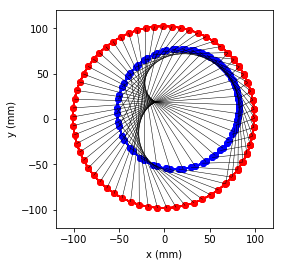

In [36]:
cmap = ['b','m','c','y','g','r','k']

ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.cla()
ax.set_xlim([-120,120])
ax.set_ylim([-120,120])
plt.axes().set_aspect('equal')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

# Plot only every 't_res'th point, up to t_max
t_res = 10
t_max = 800
plot_orbit(ax, s, 0)
plot_orbit(ax, s, 1)
plot_position(ax, s, 0, t_res, t_max)
plot_position(ax, s, 1, t_res, t_max)
#plot_observation(ax,s,0,-1,t_res)
plot_observation(ax,s,1,0,t_res, t_max)

plt.show()

### Observe the planet angle

In [6]:
ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.cla()
ax.set_xlim([0,n_sim])
ax.set_ylim([-4.,4.])
plt.xlabel('time')
plt.ylabel('$\phi$')


In [7]:
phis = s.cylindrical_relative[1][:,1]
t = np.arange(0, n_sim/n_view)*n_view

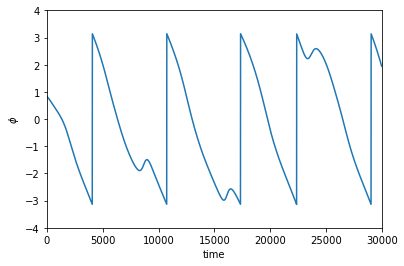

In [8]:
plt.plot(t, phis)
plt.show()

### Fit with a Ptolemian Model

### Fit with a Copernican Model

### Predict the planet angle from time series 

In [9]:
n = 20
phis = s.cylindrical_relative[1][:,1]
phis /= np.pi
series = make_time_series(phis, depth=n+1)
y = series[:,n].reshape(-1,1)
x = series[:,0:n].reshape(-1,n)

In [10]:
x.shape

(2979, 20)

In [11]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [12]:
inputs = Input(shape=(n,), dtype='float', name='main_input')
layer = Dense(60, activation='relu', kernel_initializer='normal')(inputs)
layer = Dense(15, activation='relu', kernel_initializer='normal')(layer)
predictions = Dense(1, kernel_initializer='normal')(layer)
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [13]:
model.fit(x, y)

Epoch 1/1
2979/2979 [==============================] - 0s - loss: 0.1861     


In [14]:
y_pred = model.predict(x)*np.pi
y_true = y*np.pi

In [15]:
((y_true - y_pred) / y_true)

array([[ 0.00460817],
       [ 0.00385658],
       [ 0.00310335],
       ..., 
       [-0.01988963],
       [-0.02034784],
       [-0.0208063 ]])

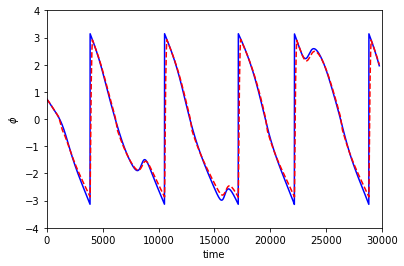

In [16]:
ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.cla()
ax.set_xlim([0,n_sim])
ax.set_ylim([-4.,4.])
plt.xlabel('time')
plt.ylabel('$\phi$')
plt.plot(t[:len(y_pred)], y_true, color='b')
plt.plot(t[:len(y_pred)], y_pred, color='r', linestyle='dashed')
plt.show()

### Generate another planet

In [17]:
s.add_body(x=[74., 76.], v=[0.075, -0.075])
s.view(0, n_view)

New body


In [18]:
phis = s.cylindrical_relative[2][:,1]
phis /= np.pi
series = make_time_series(phis, depth=n+1)
y = series[:,n].reshape(-1,1)
x = series[:,0:n].reshape(-1,n)

In [19]:
y_pred = model.predict(x)*np.pi
y_true = y*np.pi

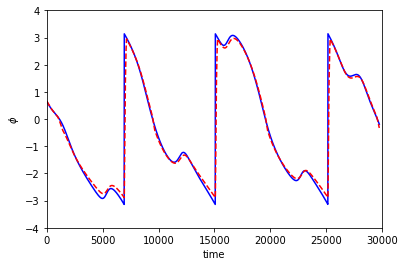

In [20]:
ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.cla()
ax.set_xlim([0,n_sim])
ax.set_ylim([-4.,4.])
plt.xlabel('time')
plt.ylabel('$\phi$')
plt.plot(t[:len(y_pred)], y_true, color='b')
plt.plot(t[:len(y_pred)], y_pred, color='r', linestyle='dashed')
plt.show()

### Repeat all with a much farther planet

New body


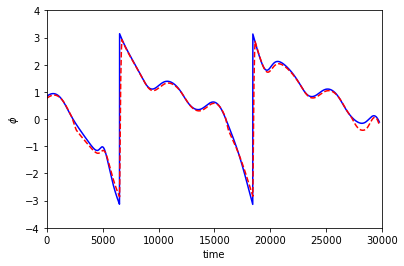

In [21]:
s.add_body(x=[174., 176.], v=[0.025, -0.035])
s.view(0, n_view)
phis = s.cylindrical_relative[3][:,1]
phis /= np.pi
series = make_time_series(phis, depth=n+1)
y = series[:,n].reshape(-1,1)
x = series[:,0:n].reshape(-1,n)
y_pred = model.predict(x)*np.pi
y_true = y*np.pi
ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.cla()
ax.set_xlim([0,n_sim])
ax.set_ylim([-4.,4.])
plt.xlabel('time')
plt.ylabel('$\phi$')
plt.plot(t[:len(y_pred)], y_true, color='b')
plt.plot(t[:len(y_pred)], y_pred, color='r', linestyle='dashed')
plt.show()

### Long time extrapolation

In [27]:
y_extr = np.zeros(len(y_true))
y_extr[0] = model.predict(x[0].reshape(-1,n))
for i in np.arange(1,len(y_true)):
    xx = np.zeros(n)
    if(i < n):
        x_old = x[i,i:n].reshape(-1,n-i)
        x_new = y_extr[0:i].reshape(-1,i)
        xx = np.append(x_new, x_old).reshape(-1,n)
    else:
        xx = y_extr[i-n:i].reshape(-1,n)
    y_extr[i] = model.predict(xx)

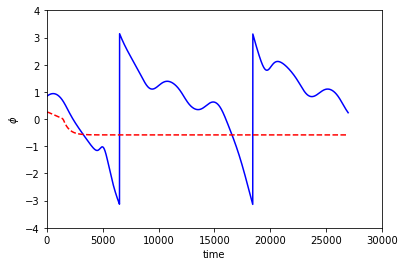

In [29]:
t_plot = 2700
ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.cla()
ax.set_xlim([0,n_sim])
ax.set_ylim([-4.,4.])
plt.xlabel('time')
plt.ylabel('$\phi$')
plt.plot(t[:t_plot], y_true[:t_plot], color='b')
plt.plot(t[:t_plot], y_extr[:t_plot], color='r', linestyle='dashed')
plt.show()

obviously fails... yet...

## Complex planetary system

Now we move to the system Gnos, where the motion of the celestial bodies is more confusing and harder to figure out.